#### Task 1: Text Preprocessing and Basic Analysis with NLTK

##### Import Libraries

In [1]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
# conda install -c conda-forge textblob
from textblob import TextBlob
# conda install -c conda-forge wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt     

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\muge\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


##### 1.1 Load one text file.

In [2]:
fo = open("C:/Users/muge/Desktop/GitHub/Harry_Potter_Book.txt", "r", encoding='utf-8')
mytext=fo.read()
print(mytext[0:1000]) 
# Not printing the whole output because it is very large  

Harry Potter and the Sorcerer's Stone 

CHAPTER ONE 

THE BOY WHO LIVED 

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. 

Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere. 

The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters

##### 1.2 Tokenize sentences and words. Print lens of sentences and tokens and only print the first 20 words.

In [3]:
# Use TextBlob to read the number of sentences
mytext_blob = TextBlob(mytext)
len(mytext_blob.sentences)  

6394

In [4]:
mytext_tokens = word_tokenize(mytext)
len(mytext_tokens)
mytext_tokens[0:20]  

['Harry',
 'Potter',
 'and',
 'the',
 'Sorcerer',
 "'s",
 'Stone',
 'CHAPTER',
 'ONE',
 'THE',
 'BOY',
 'WHO',
 'LIVED',
 'Mr.',
 'and',
 'Mrs.',
 'Dursley',
 ',',
 'of',
 'number']

##### 1.3 Remove punctuation. Only print the first 20 words.

In [5]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(mytext)
post_punctuation=[]
for i in words:
    x=i.lower()
    post_punctuation.append(x)
len(post_punctuation)  

80646

In [6]:
# Print First 20 words after removing punctuations
post_punctuation[0:20]    

['harry',
 'potter',
 'and',
 'the',
 'sorcerer',
 's',
 'stone',
 'chapter',
 'one',
 'the',
 'boy',
 'who',
 'lived',
 'mr',
 'and',
 'mrs',
 'dursley',
 'of',
 'number',
 'four']

##### 1.4 Remove stop words and count the distinct cleaned words.

In [7]:
stop_words = set(stopwords.words('english'))
# Remove stop words and count the distinct cleaned words.
cleaned_words = []
for i in post_punctuation:
    if i not in stop_words:
        cleaned_words.append(i)
print(len(cleaned_words))  

40785


##### 1.5 Lemmatize the cleaned words and count the distinct lemmatized words. What’s different from 1.4? Please clearly explain.

In [8]:
lemmatizer = WordNetLemmatizer()
Lemmatized_words = []
for i in cleaned_words:
    x = lemmatizer.lemmatize(i)
    Lemmatized_words.append(x)
print(len(Lemmatized_words)) 

40785


###### The words in version 1.5 are different from version 1.4 because they have been transformed from their original form to their basic form. For example, "drills" becomes "drill" and "Potter" stays as "Potter." When we change words like this, it's called lemmatizing which is a bit like stemming, but it doesn't cut words as much. Instead, it gives us real words that make sense.

##### 1.6 Calculate the word distribution and plot and list only top 15 words.

In [9]:
fdist = FreqDist()
for word in Lemmatized_words:
    fdist[word.lower()]+=1
fdist.most_common(15)
print(fdist) 

<FreqDist with 5109 samples and 40785 outcomes>


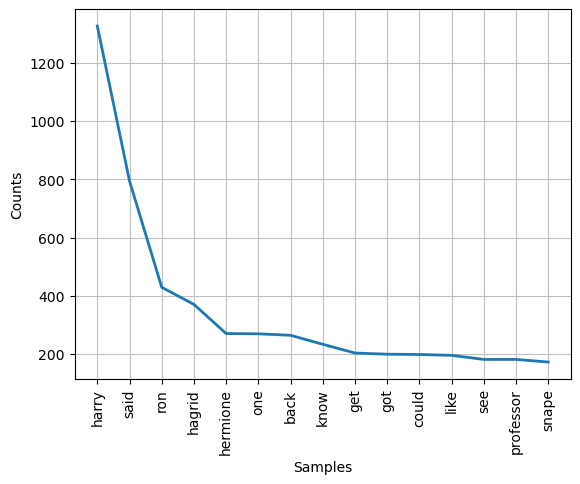

<Axes: xlabel='Samples', ylabel='Counts'>

In [10]:
fdist.plot(15)

#### Task 2: Word Clouds

##### 2.1 Follow the wordcloud simple example to generate the word cloud without stopwords directly from the original text and show it. 
###### (Note that you must remove the stopwords)

(-0.5, 399.5, 199.5, -0.5)

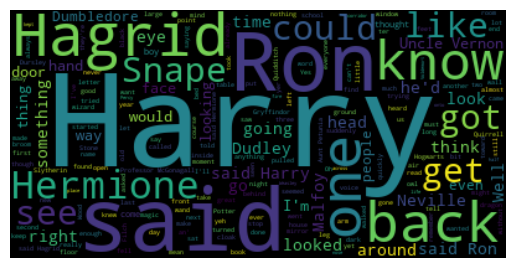

In [11]:
wordcloud = WordCloud(stopwords=stop_words,background_color = 'black').generate(mytext)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  

##### 2.2 (Generate the word cloud for the processed data in Task 1 and show the image.

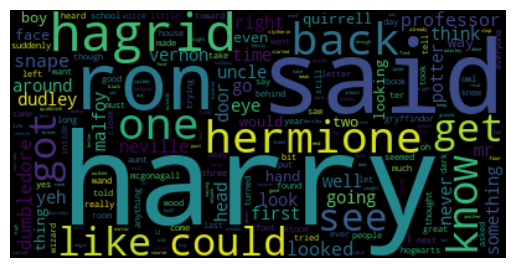

In [12]:
wordcloud1 = WordCloud().generate_from_frequencies(fdist)
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()  

##### 2.3 Compare the above two wordclouds and what difference do you find? Please clearly explain why.

###### The words in WordCloud 1 have been preprocessed, but they are not yet prepared to be used in any NLP applications.Because the terms in WordCloud 2 have been lemmatized, we can use any variation of a base term in search queries and still get relevant results observed in WordCloud 2.

#### Task 3: Please answer the following questions

##### 3.1 Based on your experience with these NLP tasks, please compare with text data processing and numeric data processing

###### Based on my experience with NLP tasks above, I can say that text data processing involves preparing, analyzing, changing, and creating text based on the given data. On the other hand, numeric data processing focuses on counting or finding how often certain words appear in the text data and using that information for analysis.Text data processing is all about working with words, sentences, and paragraphs. It helps us understand and find useful information from unstructured text. We do things like breaking text into smaller parts (like words or sentences), changing words to their basic forms, and getting rid of common words that don't add much meaning. We also use special techniques to analyze the sentiment of text (whether it's positive or negative) or find important names and places.Numeric data processing, on the other hand, deals with numbers and calculations. It's about working with structured data, like measurements or categories represented as numbers. We clean up the data, make sure everything is on the same scale, and create new features based on existing ones. We also use statistical methods to understand the data better and machine learning algorithms that are specifically designed for numbers.So, text data processing focuses on understanding and extracting meaning from words, while numeric data processing deals with numbers and calculations.